# Computer Vision
# Constructor University
# Fall 2023
# Homework 1


In this homework, we will go through basic linear algebra and image manipulation.

One of the aims of this homework assignment is to get you to start getting comfortable searching for useful library functions online. So in many of the functions you will implement, you will have to look up helper functions.

In [132]:
#Imports the print function from newer versions of python
from __future__ import print_function

#Setup

# The Random module for implements pseudo-random number generators
import random 

# Numpy is the main package for scientific computing with Python. 
# This will be one of our most used libraries in this class
import numpy as np


#Imports all the methods in each of the files: linalg.py and imageManip.py
from linalg import *
from imageManip import *


#Matplotlib is a useful plotting library for python 
import matplotlib.pyplot as plt
# This code is to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Part 1: Linear Algebra Review
In this section, we will review linear algebra and learn how to use vectors and matrices in python using numpy. By the end of this section, you will have implemented all the required methods in `linalg.py`.

## Question 1.1 (5 points)
First, let's test whether you can define the following matrices and vectors using numpy. Look up `np.array()` for help. In the next code block, define $M$ as a $(4, 3)$ matrix, $a$ as a $(1, 3)$ row vector and $b$ as a $(3, 1)$ column vector:

$$M = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
10 & 11 & 12 \end{bmatrix}
$$

$$a = \begin{bmatrix}
1 & 1 & 0
\end{bmatrix}
$$

$$b = \begin{bmatrix}
-1 \\ 2 \\ 5
\end{bmatrix}  
$$ 

In [133]:
### YOUR CODE HERE
import numpy as np
M = (np.arange(12) + 1).reshape(4,3)

a = np.array([[1, 1, 0]])

b = np.array([[-1], [2], [5]])

pass
### END CODE HERE
print("M = \n", M)
print("The size of M is: ", M.shape)
print()
print("a = ", a)
print("The size of a is: ", a.shape)
print()
print("b = \n ", b)
print("The size of b is: ", b.shape)

M = 
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
The size of M is:  (4, 3)

a =  [[1 1 0]]
The size of a is:  (1, 3)

b = 
  [[-1]
 [ 2]
 [ 5]]
The size of b is:  (3, 1)


## Question 1.2 (5 points)
Implement the `dot_product()` method in `linalg.py` and check that it returns the correct answer for $a^Tb$.

In [134]:
# Now, let's test out this dot product. Your answer should be [[1]].
a_TRANSPOSE = np.transpose(a)

def dot_product(a, b):
    if a.shape[1] != b.shape[0]:
        raise ValueError("Number of columns in a must be equal to the number of rows in b")

    aDotB = np.zeros((a.shape[0], b.shape[1]))  # Initialize the result matrix

    for i in range(a.shape[0]):
        for j in range(b.shape[1]):
            dot_sum = 0
            for k in range(a.shape[1]):
                dot_sum += a[i, k] * b[k, j]
            aDotB[i, j] = dot_sum

    return aDotB

aDotB = dot_product(a, b)  # Use the transposed matrix
print(aDotB)

print("The size is: ", aDotB.shape)

[[1.]]
The size is:  (1, 1)


## Question 1.3 (5 points)
Implement  the `complicated_matrix_function()` method in `linalg.py` and use it to compute $(a^T b)Ma^T$.

IMPORTANT NOTE: The `complicated_matrix_function()` method expects all inputs to be two dimensional numpy arrays, as opposed to 1-D arrays.  This is an important distinction, because 2-D arrays can be transposed, while 1-D arrays cannot.

To transpose a 2-D array, you can use the syntax `array.T` 

In [186]:
# Your answer should be $[[3], [9], [15], [21]]$ of shape(4, 1).

def complicated_matrix_function(M, a, b):
    """Implement (a * b) * (M * a.T).

    (optional): Use the `dot_product(a, b)` function you wrote above
    as a helper function.

    Args:
        M: numpy matrix of shape (x, n).
        a: numpy array of shape (1, n).
        b: numpy array of shape (n, 1).

    Returns:
        out: numpy matrix of shape (x, 1).
    """
    out = None
    ### YOUR CODE HERE
    #(𝑎𝑇𝑏)𝑀𝑎𝑇
    
    out = dot_product(a,b) * dot_product(M, a.T) 
    #out = dot_product(dot_product(dot_product(a,b), M), a.T)
    #out = dot_product(dot_product(a, b), dot_product(M, a.T))
    print(out)
    ### END YOUR CODE

    return out



In [183]:
M = np.array(range(4)).reshape((2,2))
a = np.array([[1,1]])
b = np.array([[10, 10]]).T

print(M.shape)
print(a.shape)
print(b.shape)
print()


# Your answer should be $[[ 20], [100]]$ of shape(2, 1).
ans = complicated_matrix_function(M, a, b)
print(ans)
print()
print("The size is: ", ans.shape)

(2, 2)
(1, 2)
(2, 1)

[[ 20.]
 [100.]]

The size is:  (2, 1)


## Question 1.4 (10 points)
Implement `svd()` and `get_singular_values()` methods. In this method, perform singular value decomposition on the input matrix and return the largest k singular values (k is specified in the method calls below).

In [158]:
# Let's first only get the first singular value and print it out. It should be ~ 25.46.
import numpy as np

M = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

U, S, Vt = np.linalg.svd(M)

only_first_singular_value = S[0]

print(only_first_singular_value)

# Now, let's get the first two singular values.

# Notice the first singular value is a lot larger than the second one.

first_two_singular_values = S[:2]
print(first_two_singular_values)

# Let's make sure that the first singular value in both is the same.
assert only_first_singular_value == first_two_singular_values[0]

16.84810335261421
[16.84810335  1.06836951]


## Question 1.5 (10 points)
Implement `eigen_decomp()` and `get_eigen_values_and_vectors()` methods. In this method, perform eigenvalue decomposition on the following matrix and return the largest k eigen values and corresponding eigen vectors (k is specified in the method calls below).

$$M = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \end{bmatrix}
$$


In [179]:
# Let's define M.

def get_eigen_values_and_vectors(A, k):
    
    w, v = np.linalg.eig(A)
    
    #sorting the eigenvalues in decreasing order.
    
    idx = w.argsort()[::-1]
    w = w[idx]
    v = v[:, idx]
    return w[:k], v[:, :k]
    
    
M = np.array([[1,2,3],[4,5,6],[7,8,9]])

val, vec = get_eigen_values_and_vectors(M, 1)

# Now let's grab the first eigenvalue and first eigenvector.
print("First eigenvalue =", val[0])
print()
print("First eigenvector =", vec[0])
print()
#assert len(vec) == 1
# You should get back a single eigenvalue and a single eigenvector.

# Now, let's get the first two eigenvalues and eigenvectors.
val, vec = get_eigen_values_and_vectors(M, 2)
# You should get back a list of two eigenvalues and a list of two eigenvector arrays.

print("Eigenvalues =", val)
print()
print("Eigenvectors =", vec)
#assert len(vec) == 2


First eigenvalue = 16.116843969807043

First eigenvector = [-0.23197069]

Eigenvalues = [ 1.61168440e+01 -1.30367773e-15]

Eigenvectors = [[-0.23197069  0.40824829]
 [-0.52532209 -0.81649658]
 [-0.8186735   0.40824829]]


# Part 2: Image Manipulation 

Now that you are familiar with using matrices and vectors. Let's load some images and treat them as matrices and do some operations on them. By the end of this section, you will have implemented all the methods in `imageManip.py`.

In [197]:
# Run this code to set the locations of the images we will be using. 
# You can change these paths to point to your own images if you want to try them out for fun.

image1_path = "/Users/vaya/Downloads/hw1/image1.jpg"
image2_path = "/Users/vaya/Downloads/hw1/image2.jpg"

def display(img):
    # Show image
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

## Question 2.1 (5 points)
Implement the load method in imageManip.py and read the display method below. We will use these two methods through the rest of the notebook to visualize our work.

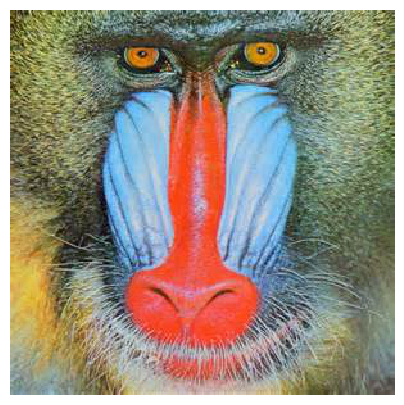

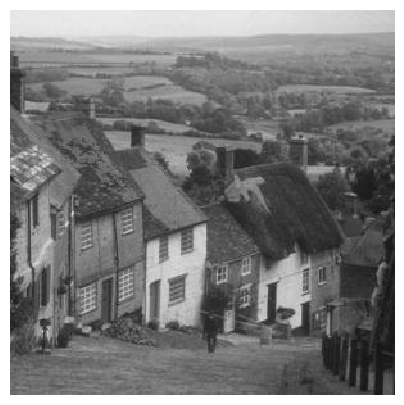

In [203]:
image1 = load(image1_path)
image2 = load(image2_path)

display(image1)
display(image2)

## Question 2.2 (10 points)
Implement the `dim_image()` method by converting images according to  $x_n = 0.5*x_p^2$ for every pixel, where $x_n$ is the new value and $x_p$ is the original value.

Note: Since all the pixel values of the image are in the range $[0, 1]$, the above formula will result in reducing these pixels values and therefore make the image dimmer.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


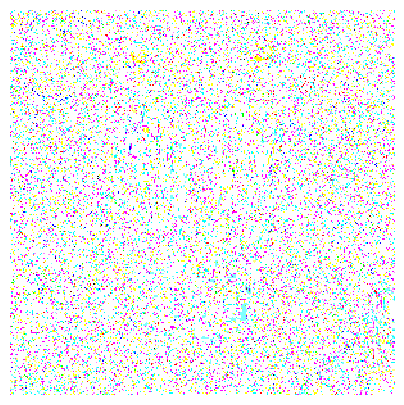

In [204]:
new_image = dim_image(image1)
display(new_image)

## Question 2.3 (10 points)
Implement the convert_to_grey_scale method and convert the image into grey scale.

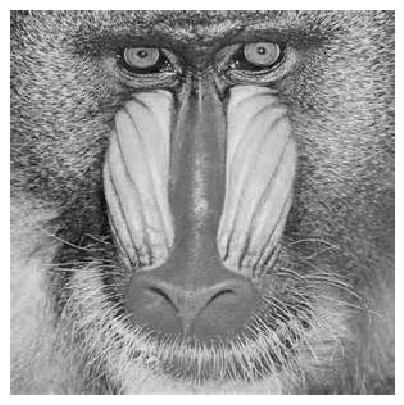

In [205]:
grey_image = convert_to_grey_scale(image1)
display(grey_image)

## Question 2.4 (10 points)
Implement the `rgb_exclusion()`, in which the input image is decomposed into the three channels: R, G and B and return the image excluding the specified channel. 

Below is the image without the red channel.


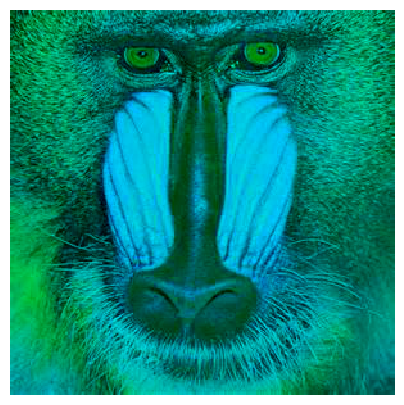

Below is the image without the green channel.


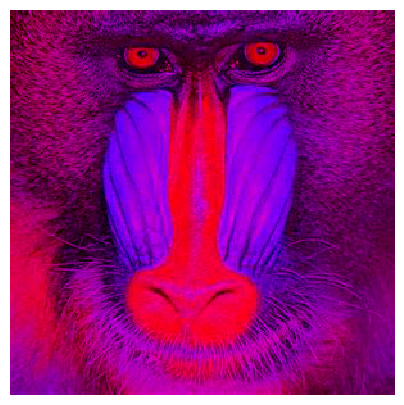

Below is the image without the blue channel.


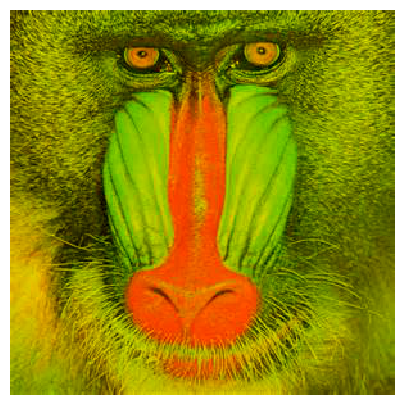

In [210]:
without_red = rgb_exclusion(image1, 'R')
without_blue = rgb_exclusion(image1, 'B')
without_green = rgb_exclusion(image1, 'G')

print("Below is the image without the red channel.")
display(without_red)

print("Below is the image without the green channel.")
display(without_green)

print("Below is the image without the blue channel.")
display(without_blue)

## Question 2.5 (10 points)
Implement the `hsv_decomposition()`, in which the input image is decomposed into the three channels: H, S and V and return the values for the specified channel. 

In [223]:
image_h = hsv_decomposition(image1, 'H')
image_s = hsv_decomposition(image1, 'S')
image_v = hsv_decomposition(image1, 'V')

print("Below is the image with only the H channel.")
display(image_h)

print("Below is the image with only the S channel.")
display(image_s)

print("Below is the image with only the V channel.")
display(image_v)

AttributeError: ndim

### Question:
Explain in 2-3 sentences what the H, S and V channels are and what happens when you take away the both the H and S channels.
### Answer:
Write your answer here.

H is the Hue which is basically the shade of the colour, and is normally represented on the colour wheel from 0 to 360 degrees.

S is the saturation which is the intensity of the colour as it goes from a light shade all the way to a dark intense shade of that colour.

V is the value which si the lightness or darkness of the shade/colour, so a higher value would result in a lighter colour, and a lower value will result in a darker colour.

removing both the hue and and saturation, you are left with a gray scale image, since there is no colour in the image additionally the only intensity of the color is between black and white which will lead to a gray scale image.

## Question 2.6 (10 points)
In mix_images method, create a new image such that the left half of the image is the left half of image1 and the
right half of the image is the right half of image2. Exclude the specified channel for the given image. 

You should see the left half of the monkey without the red channel and the right half of the house image with no green channel.

In [ ]:
image_mixed = mix_images(image1, image2, channel1='R', channel2='G')
display(image_mixed)

#Sanity Check: the sum of the image matrix should be 76421.98
np.sum(image_mixed)